## <font>Weber Souza</font>
## <font >Deep Learning Para Aplicações de IA com PyTorch e Lightning</font>

# <font >Pseudo aleatóriedade - Van Neumann</font>
## <font >Ferramentas para construção e melhoramento de código</font>

In [2]:
# Instalando e Carregando os Pacotes
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [3]:
# Imports
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt


np.random.rand()

0.3595905613344502

## <font> Modelo - Van Neumann - Middle-Square Method    </font>

In [4]:
# semente = 5 # momoento que o primeiro rand é rodado
# formula(x) = x * 3 / 2
# formula(5) = 7.5
# formula(7.5) = 11.25

In [5]:
5*3/2

7.5

In [6]:
7.5*3/2

11.25

In [7]:
seed = 150
# 12345
# 90000*90000
# 8100000000

In [8]:
# Função para criar o modelo
def middle_square():
  global seed
  result = seed * seed
  result = "{0:08d}".format(result)
  result = result[2:6]
  # print(result)
  result = int(result)
  seed = result
  return result

In [9]:
print(middle_square())
print(middle_square())
print(middle_square())
print(middle_square())
print(middle_square())

225
506
2560
5536
6472


## <font> Teste   </font>

In [10]:
def test_random(pseudo_random_generator):
  results = np.array([pseudo_random_generator() for i in tqdm(range(10000000))])
  results = pd.DataFrame(np.array([results]).T, columns=["middle_square"])
  print(results.mean())
  results.plot(kind='hist')
  plt.show()
  display(results.value_counts().head())

100%|██████████████████████████████████████████████████████████████████| 10000000/10000000 [00:13<00:00, 744484.05it/s]


middle_square    5099.997823
dtype: float64


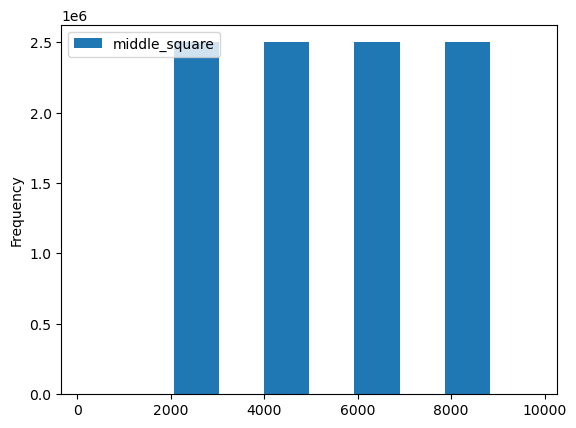

middle_square
4100             2499987
6100             2499987
8100             2499987
2100             2499986
7722                   1
dtype: int64

In [11]:
seed = 150

test_random(middle_square)

In [12]:
# From https://en.wikipedia.org/wiki/Middle-square_method

seed_number = 150

number = seed_number
already_seen = set()
counter = 0

while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = int(str(number * number).zfill(8)[2:6])  # zfill adds padding of zeroes
    print(f"#{counter}: {number}")

print(f"We began with {seed_number}, and"
      f" have repeated ourselves after {counter} steps"
      f" with {number}.")

#1: 225
#2: 506
#3: 2560
#4: 5536
#5: 6472
#6: 8867
#7: 6236
#8: 8876
#9: 7833
#10: 3558
#11: 6593
#12: 4676
#13: 8649
#14: 8052
#15: 8347
#16: 6724
#17: 2121
#18: 4986
#19: 8601
#20: 9772
#21: 4919
#22: 1965
#23: 8612
#24: 1665
#25: 7722
#26: 6292
#27: 5892
#28: 7156
#29: 2083
#30: 3388
#31: 4785
#32: 8962
#33: 3174
#34: 742
#35: 5505
#36: 3050
#37: 3025
#38: 1506
#39: 2680
#40: 1824
#41: 3269
#42: 6863
#43: 1007
#44: 140
#45: 196
#46: 384
#47: 1474
#48: 1726
#49: 9790
#50: 8441
#51: 2504
#52: 2700
#53: 2900
#54: 4100
#55: 8100
#56: 6100
#57: 2100
#58: 4100
We began with 150, and have repeated ourselves after 58 steps with 4100.


In [13]:
x = 0
weil_counter = 0
k = int("0xb5ad4eceda1ce2a9", 0)

def msws():
  global x, weil_counter, k
  result = x * x
  weil_counter += k
  result += weil_counter
  result = str(result).zfill(8)
  result = result[2:6]
  # print(result)
  result = int(result)
  x = result
  return result

In [14]:
k

13091206342165455529

100%|██████████████████████████████████████████████████████████████████| 10000000/10000000 [00:15<00:00, 664704.19it/s]


middle_square    4974.196678
dtype: float64


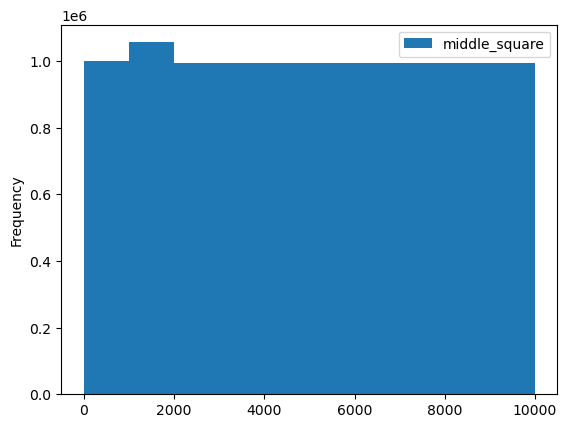

middle_square
952              1071
1694             1071
1076             1071
1508             1071
1404             1071
dtype: int64

In [16]:
test_random(msws)